###Understand data
###PreProcess
###Sampling
###Testing

In [20]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV

from imblearn.pipeline import make_pipeline as make_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, accuracy_score

In [2]:
# Import Dataset

df = pd.read_csv('../Resources/creditcard.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
print(df.describe())
print(df.columns)

print(df.shape)

print(df.info())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: title={'center': 'Distribution \n 0: No Fraud 1: Fraud'}, xlabel='Class', ylabel='Count'>

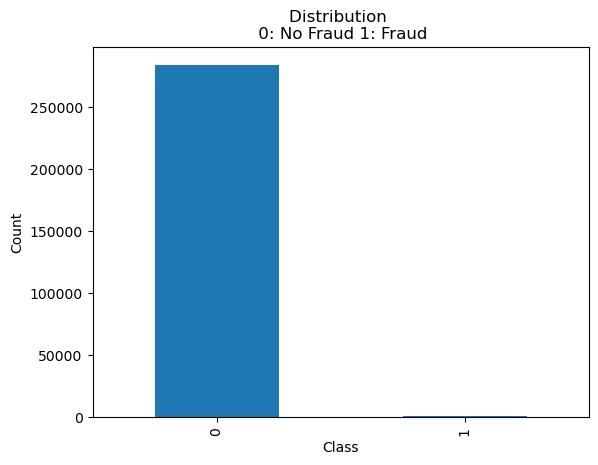

In [5]:
df['Class'].value_counts().plot(kind='bar', title='Distribution \n 0: No Fraud 1: Fraud', ylabel='Count')

In [6]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [7]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df.insert(28, 'scaled_amount', scaled_amount)
df.insert(29, 'scaled_time', scaled_time)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In [8]:
print(f'Frauds {round(df["Class"].value_counts()[1] / len(df) * 100, 2)}% of the dataset')
print(f'No Frauds {round(df["Class"].value_counts()[0] / len(df) * 100, 2)}% of the dataset')

Frauds 0.17% of the dataset
No Frauds 99.83% of the dataset


In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

kfold = StratifiedKFold(n_splits=5)

for train_index, test_index in kfold.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

display(X)

display(y)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
(227846, 30)
(56961, 30)
(227846,)
(56961,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,1.641974


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:500]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


under_sampled_df = normal_distributed_df.sample(frac=1, random_state=42)

under_sampled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
23308,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,-2.734156,...,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,-0.353229,-1.308284,1
42741,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,-13.215172,...,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1.482172,-1.128428,1
280453,-0.195701,0.931604,0.171368,-0.621118,0.276541,-1.197208,0.892256,-0.125743,0.335812,-0.061291,...,-0.693874,0.088215,0.002665,-0.482342,0.146737,0.348811,0.154072,-0.348072,1.573493,0
8312,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,...,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,-0.349231,-1.763009,1
69498,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,-0.321245,-0.871016,1


<Axes: title={'center': 'Distribution \n 0: No Fraud 1: Fraud'}, xlabel='Class', ylabel='Count'>

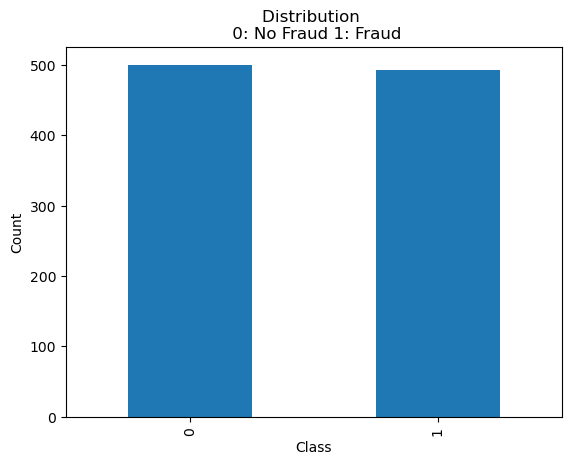

In [11]:
under_sampled_df['Class'].value_counts().plot(kind='bar', title='Distribution \n 0: No Fraud 1: Fraud', ylabel='Count')

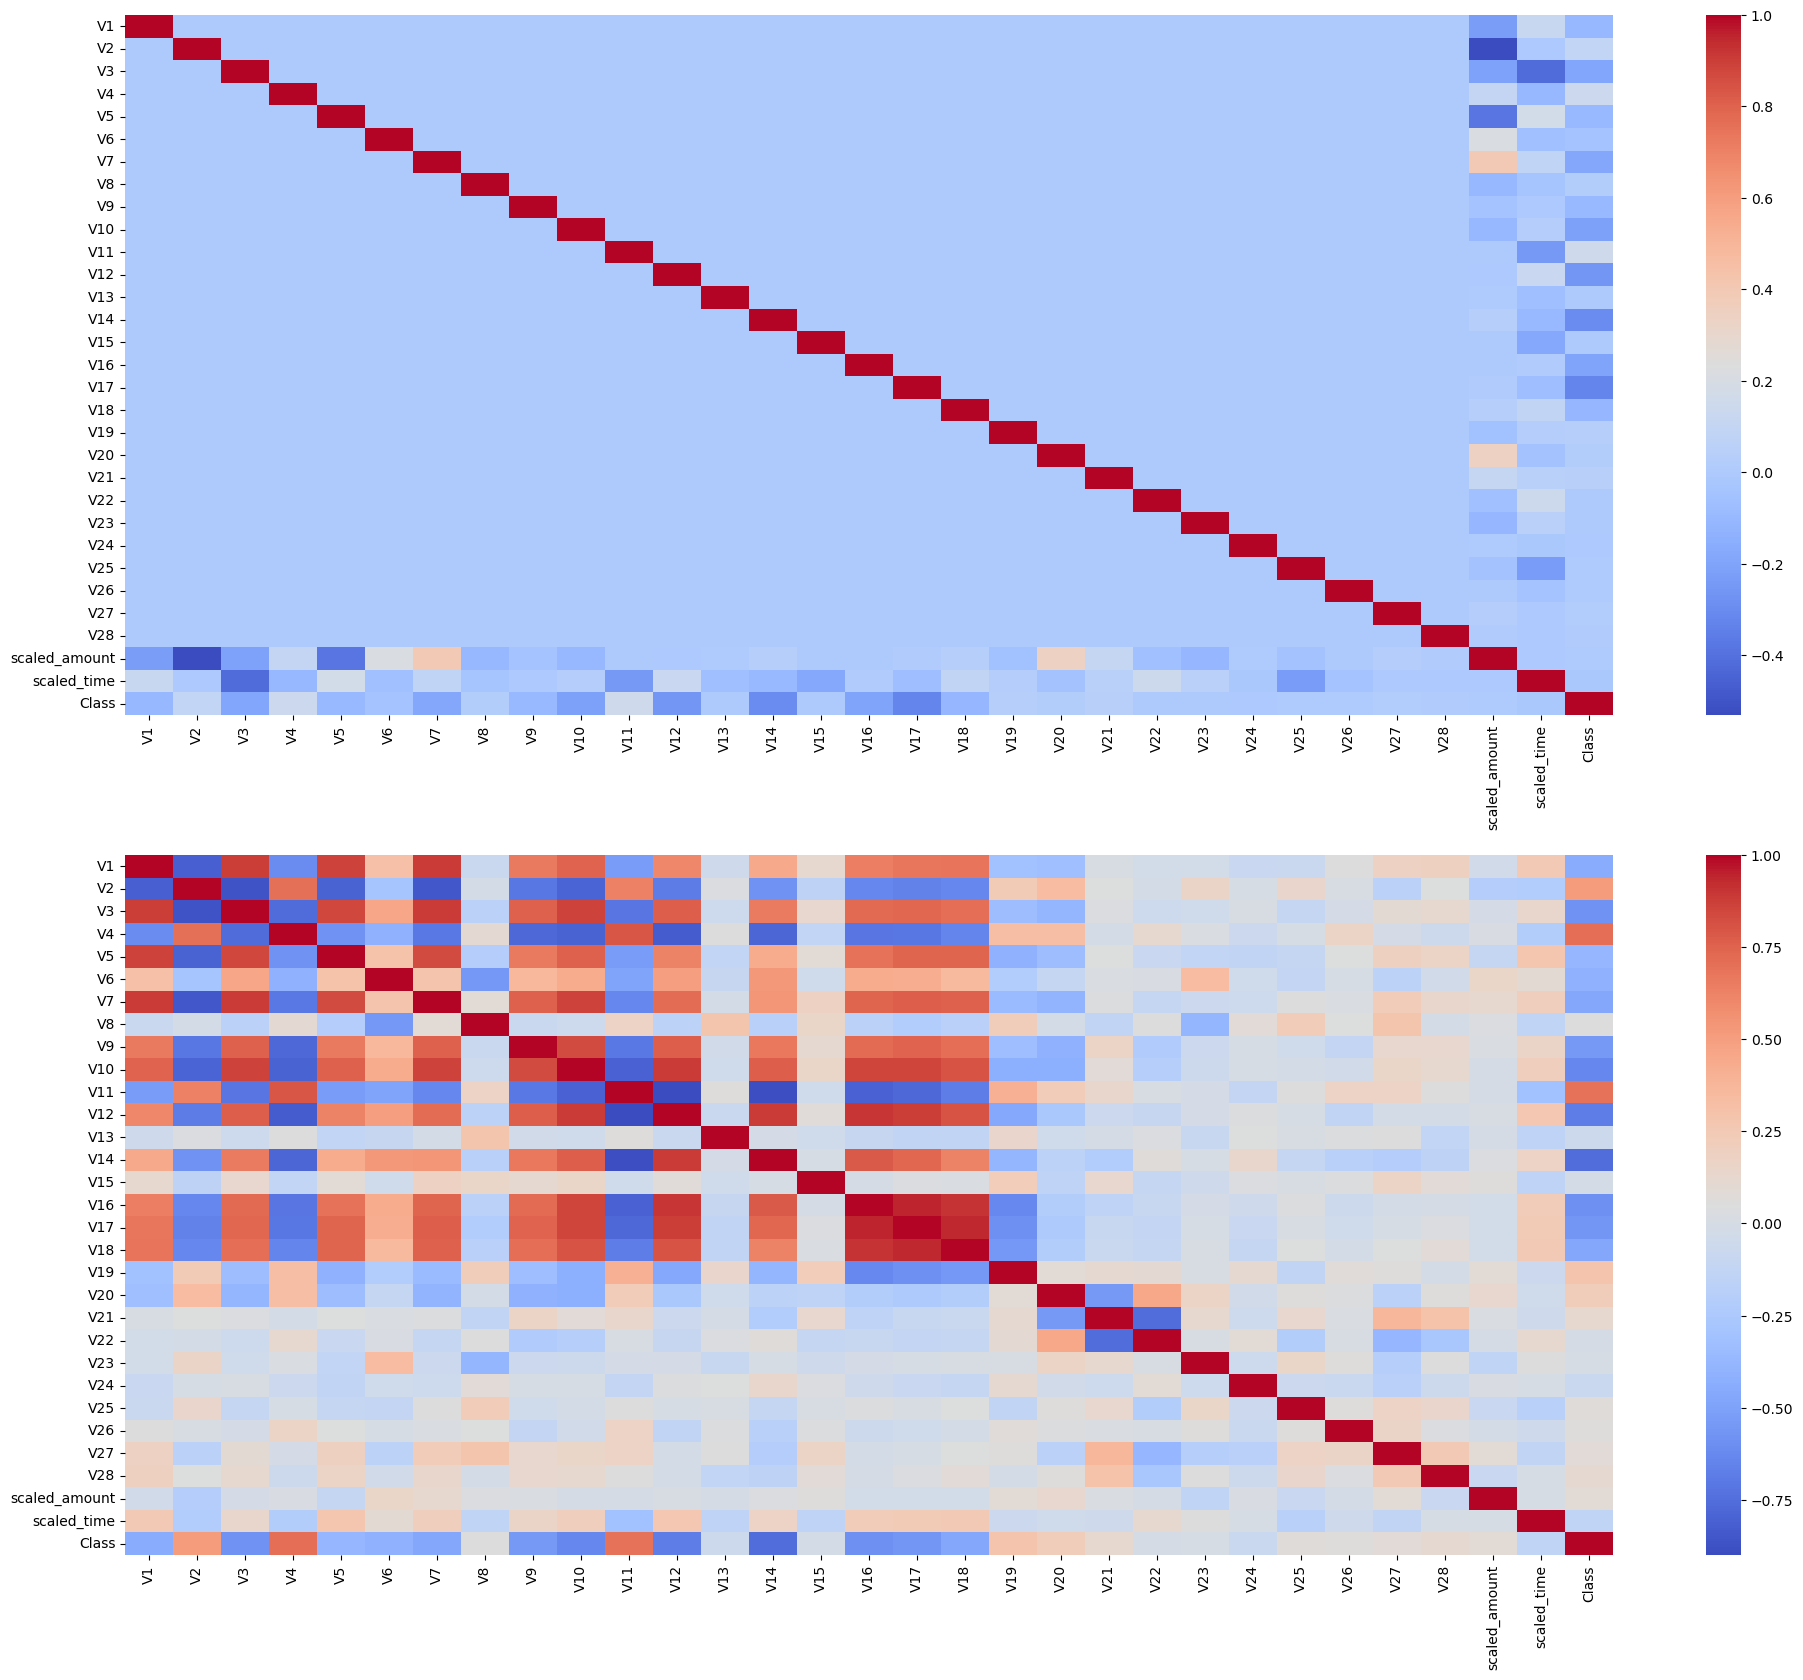

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', ax=ax1)

under_sampled_corr = under_sampled_df.corr()
sns.heatmap(under_sampled_corr, cmap='coolwarm', ax=ax2)

plt.show()

In [13]:
under_sampled_corr = under_sampled_df.corr().abs()

under_sampled_corr

threshold = 0.8

highly_corr_features = np.where(under_sampled_corr > threshold)

highly_corr_features = [(under_sampled_corr.index[x], under_sampled_corr.columns[y]) for x, y in zip(*highly_corr_features) if x != y and x < y]

highly_corr_features

[('V1', 'V2'),
 ('V1', 'V3'),
 ('V1', 'V5'),
 ('V1', 'V7'),
 ('V2', 'V3'),
 ('V2', 'V7'),
 ('V3', 'V5'),
 ('V3', 'V7'),
 ('V3', 'V10'),
 ('V4', 'V12'),
 ('V5', 'V7'),
 ('V7', 'V10'),
 ('V9', 'V10'),
 ('V10', 'V11'),
 ('V10', 'V12'),
 ('V10', 'V16'),
 ('V10', 'V17'),
 ('V10', 'V18'),
 ('V11', 'V12'),
 ('V11', 'V14'),
 ('V11', 'V16'),
 ('V12', 'V14'),
 ('V12', 'V16'),
 ('V12', 'V17'),
 ('V16', 'V17'),
 ('V16', 'V18'),
 ('V17', 'V18')]

In [14]:
X = sm.add_constant(under_sampled_df)

X

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
7,68.385395,V7
3,30.366553,V3
5,27.302357,V5
2,24.347006,V2
17,21.995671,V17
10,18.785168,V10
16,17.266574,V16
12,17.027869,V12
1,12.324557,V1
14,12.232352,V14


In [15]:
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_search_cv = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for train_index, test_index in stratified_k_fold.split(X_train, y_train):
    pipeline = make_pipeline(
        SMOTE(sampling_strategy='minority'),
        rand_search_cv
    )
    
    model = pipeline.fit(X_train[train_index], y_train[train_index])
    best_estimator = rand_search_cv.best_estimator_
    prediction = best_estimator.predict(X_train[test_index])
    
    accuracy_list.append(pipeline.score(X_train[test_index], y_train[test_index]))
    precision_list.append(precision_score(y_train[test_index], prediction))
    recall_list.append(recall_score(y_train[test_index], prediction))
    f1_list.append(f1_score(y_train[test_index], prediction))
    auc_list.append(roc_auc_score(y_train[test_index], prediction))


print(f'Accuracy: {np.mean(accuracy_list)}')
print(f'Precision: {np.mean(precision_list)}')
print(f'Recall: {np.mean(recall_list)}')
print(f'F1: {np.mean(f1_list)}')
print(f'AUC: {np.mean(auc_list)}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver

Accuracy: 0.958586446008783
Precision: 0.06284974711907443
Recall: 0.9137617656604998
F1: 0.11606622264075266
AUC: 0.9362129391629704


In [16]:
from sklearn.metrics import classification_report


labels = ['No Fraud', 'Fraud']

smote_prediction = best_estimator.predict(X_test)

print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



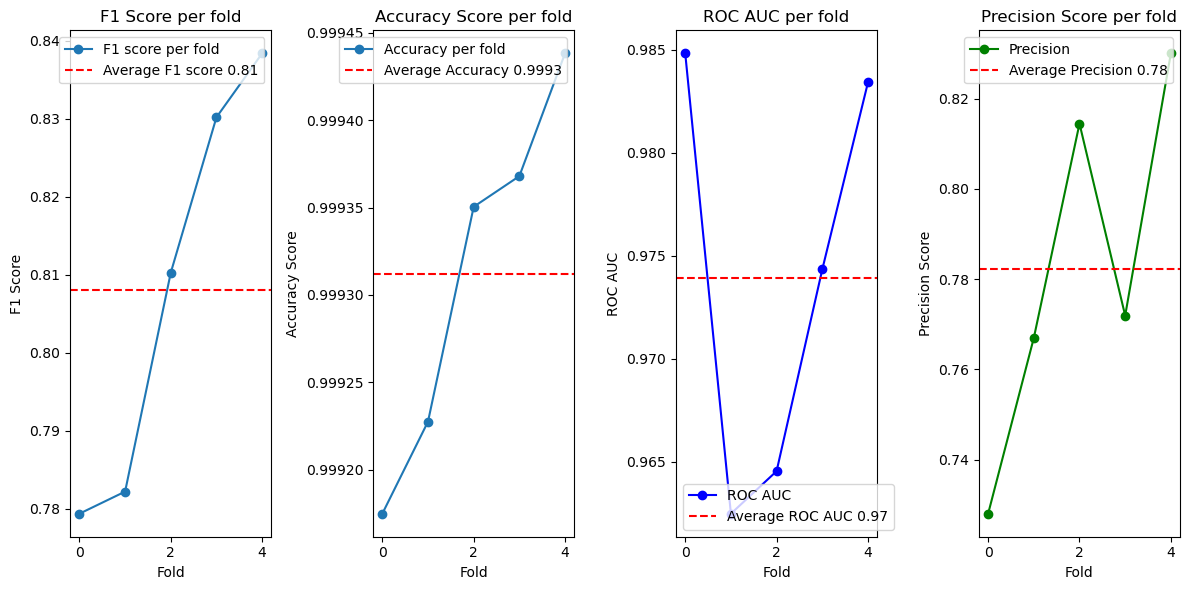

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')

smote = SMOTE(random_state=42)

#scores = cross_val_score(xgb_model, X_train, y_train, cv=stratified_k_fold)

# print(f'Scores for each fold are: {scores}')
# print(f'Accuracy: {np.mean(scores):.4f}')

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
precision_scores = []
confusion_matrices = []

# Cross-validation
for train_index, test_index in stratified_k_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # display(X_train.shape)
    # display(y_train.shape)
    
    # display(y_train.value_counts())
    
    # Apply SMOTE to training data
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    # display(X_train_res.shape)
    # display(y_train_res.shape)
    
    # display(y_train_res.value_counts())
    
    # Train the model
    xgb_model.fit(X_train_res, y_train_res)
    
    # Predictions
    y_pred = xgb_model.predict(X_test)
    y_prob = xgb_model.predict_proba(X_test)[:, 1]
    
    # Metrics
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    precision_scores.append(precision)
    confusion_matrices.append(conf_matrix)

# # Plot metrics
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 3, 1)
# plt.plot(f1_scores, label='F1 score', marker='o')
# plt.title('F1 Score per fold')
# plt.xlabel('Fold')
# plt.ylabel('F1 Score')
# plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(roc_auc_scores, label='ROC AUC', color='blue', marker='o')
# plt.title('ROC AUC per fold')
# plt.xlabel('Fold')
# plt.ylabel('ROC AUC')
# plt.legend()

# plt.subplot(1, 3, 3)
# plt.plot(precision_scores, label='Precision', color='green', marker='o')
# plt.title('Precision Score per fold')
# plt.xlabel('Fold')
# plt.ylabel('Precision')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot Confusion Matrix
# for i, conf_matrix in enumerate(confusion_matrices):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title(f'Confusion Matrix for Fold {i+1}')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

# Average metrics
average_f1 = np.mean(f1_scores)
average_roc_auc = np.mean(roc_auc_scores)
average_precision = np.mean(precision_scores)

# Combined Confusion Matrix
combined_conf_matrix = np.sum(confusion_matrices, axis=0)

# F1 Score across all folds and average values
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.plot(f1_scores, label='F1 score per fold', marker='o')
plt.axhline(y=average_f1, color='red', linestyle='--', label=f'Average F1 score {average_f1:.2f}')
plt.title('F1 Score per fold')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Accuracy Score across all folds and average values
plt.subplot(1, 4, 2)
plt.plot(accuracy_scores, label='Accuracy per fold', marker='o')
plt.axhline(y=np.mean(accuracy_scores), color='red', linestyle='--', label=f'Average Accuracy {np.mean(accuracy_scores):.4f}')
plt.title('Accuracy Score per fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.legend()

# ROC AUC Score across all folds and average values
plt.subplot(1, 4, 3)
plt.plot(roc_auc_scores, label='ROC AUC', color='blue', marker='o')
plt.axhline(y=average_roc_auc, color='red', linestyle='--', label=f'Average ROC AUC {average_roc_auc:.2f}')
plt.title('ROC AUC per fold')
plt.xlabel('Fold')
plt.ylabel('ROC AUC')
plt.legend()

# Precision Score across all folds and average values
plt.subplot(1, 4, 4)
plt.plot(precision_scores, label='Precision', color='green', marker='o')
plt.axhline(y=average_precision, color='red', linestyle='--', label=f'Average Precision {average_precision:.2f}')  
plt.title('Precision Score per fold')
plt.xlabel('Fold')
plt.ylabel('Precision Score')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Select the best hyperparameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=20, max_samples=0.8, n_jobs=-1, class_weight='balanced', max_depth=10, max_features='sqrt')
param_grid = { 'max_depth': list(range(1, 11)) }
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='f1')

random_search.fit(X_train, y_train)

print("Best max_depth:", random_search.best_params_['max_depth'])
print("Best F1 score:", random_search.best_score_)

Best max_depth: 10
Best F1 score: 0.8238060738060738


In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

stratified_k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

rfc_model = RandomForestClassifier(random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
precision_scores = []
confusion_matrices = []

for train_index, test_index in stratified_k_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to training data
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    rfc_model.fit(X_train_res, y_train_res)
    
    y_pred = rfc_model.predict(X_test)
    y_prob = rfc_model.predict_proba(X_test)[:, 1]
    
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    precision_scores.append(precision)
    confusion_matrices.append(conf_matrix)

# Average metrics
average_f1 = np.mean(f1_scores)
average_roc_auc = np.mean(roc_auc_scores)
average_precision = np.mean(precision_scores)

# Combined Confusion Matrix
combined_conf_matrix = np.sum(confusion_matrices, axis=0)

# F1 Score across all folds and average values
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.plot(f1_scores, label='F1 score per fold', marker='o')
plt.axhline(y=average_f1, color='red', linestyle='--', label=f'Average F1 score {average_f1:.2f}')
plt.title('F1 Score per fold')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Accuracy Score across all folds and average values
plt.subplot(1, 4, 2)
plt.plot(accuracy_scores, label='Accuracy per fold', marker='o')
plt.axhline(y=np.mean(accuracy_scores), color='red', linestyle='--', label=f'Average Accuracy {np.mean(accuracy_scores):.4f}')
plt.title('Accuracy Score per fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.legend()

# ROC AUC Score across all folds and average values
plt.subplot(1, 4, 3)
plt.plot(roc_auc_scores, label='ROC AUC', color='blue', marker='o')
plt.axhline(y=average_roc_auc, color='red', linestyle='--', label=f'Average ROC AUC {average_roc_auc:.2f}')
plt.title('ROC AUC per fold')
plt.xlabel('Fold')
plt.ylabel('ROC AUC')
plt.legend()

# Precision Score across all folds and average values
plt.subplot(1, 4, 4)
plt.plot(precision_scores, label='Precision', color='green', marker='o')
plt.axhline(y=average_precision, color='red', linestyle='--', label=f'Average Precision {average_precision:.2f}')  
plt.title('Precision Score per fold')
plt.xlabel('Fold')
plt.ylabel('Precision Score')
plt.legend()

plt.tight_layout()
plt.show()

KeyboardInterrupt: 